In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/sugosh/Downloads/MSFT.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-07-19,32.400002,32.669998,31.020000,31.400000,26.166113,248428500
1,2013-07-22,31.700001,32.009998,31.600000,32.009998,26.674431,79040700
2,2013-07-23,31.910000,32.040001,31.709999,31.820000,26.516104,65810400
3,2013-07-24,32.040001,32.189999,31.889999,31.959999,26.632767,52803100
4,2013-07-25,31.620001,31.650000,31.250000,31.389999,26.157772,63213000
...,...,...,...,...,...,...,...
2512,2023-07-13,339.559998,343.739990,339.019989,342.660004,342.660004,20567200
2513,2023-07-14,347.589996,351.429993,344.309998,345.239990,345.239990,28302200
2514,2023-07-17,345.679993,346.989990,342.200012,345.730011,345.730011,20363900
2515,2023-07-18,345.829987,366.779999,342.170013,359.489990,359.489990,64872700


In [3]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,32.400002,32.669998,31.020000,31.400000,248428500
1,31.700001,32.009998,31.600000,32.009998,79040700
2,31.910000,32.040001,31.709999,31.820000,65810400
3,32.040001,32.189999,31.889999,31.959999,52803100
4,31.620001,31.650000,31.250000,31.389999,63213000


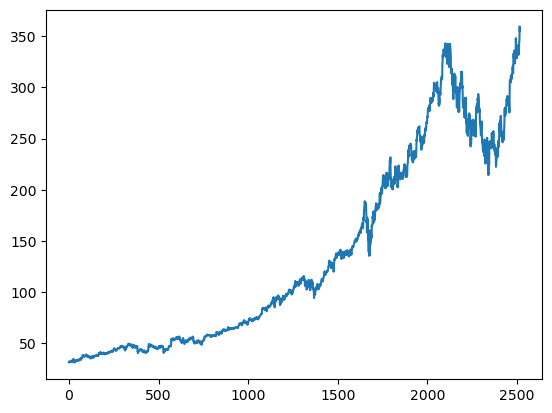

In [4]:
import matplotlib.pyplot as plt

plt.plot(df.Close)  ## Graph to show the closing price of Microsoft Stocks

In [5]:
## Find the mean of the closing values of the previous 100 days - MOVING AVERAGE 

ma100=df.Close.rolling(100).mean() ## moving average is calculated by the rolling function
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2512    300.3098
2513    301.1816
2514    302.1122
2515    303.1920
2516    304.1951
Name: Close, Length: 2517, dtype: float64

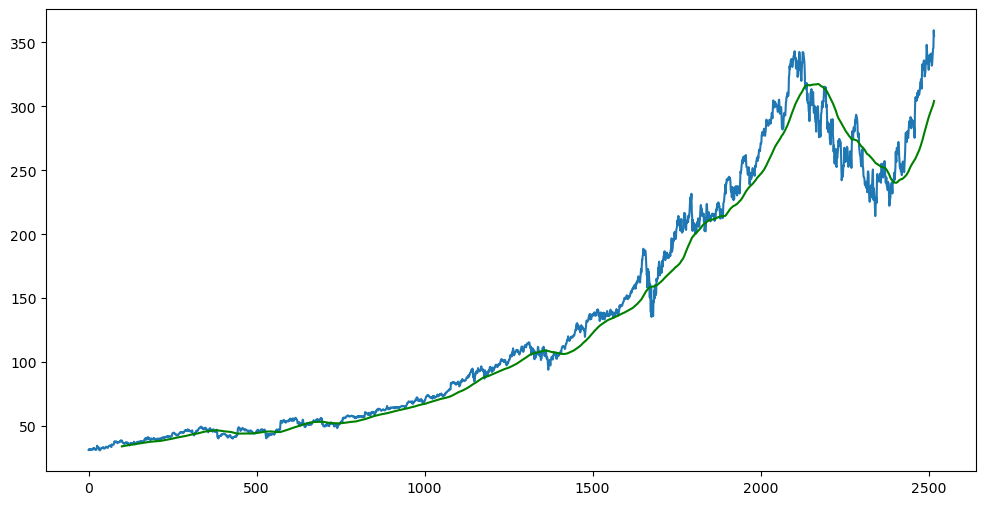

In [6]:
## Plot the graph for moving average for 100 days against original closing values

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'g')

In [7]:
## Find the mean of the closing values of the previous 200 days - MOVING AVERAGE 

ma200=df.Close.rolling(200).mean() ## moving average is calculated by the rolling function
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    271.24730
2513    271.78625
2514    272.33285
2515    272.92495
2516    273.51285
Name: Close, Length: 2517, dtype: float64

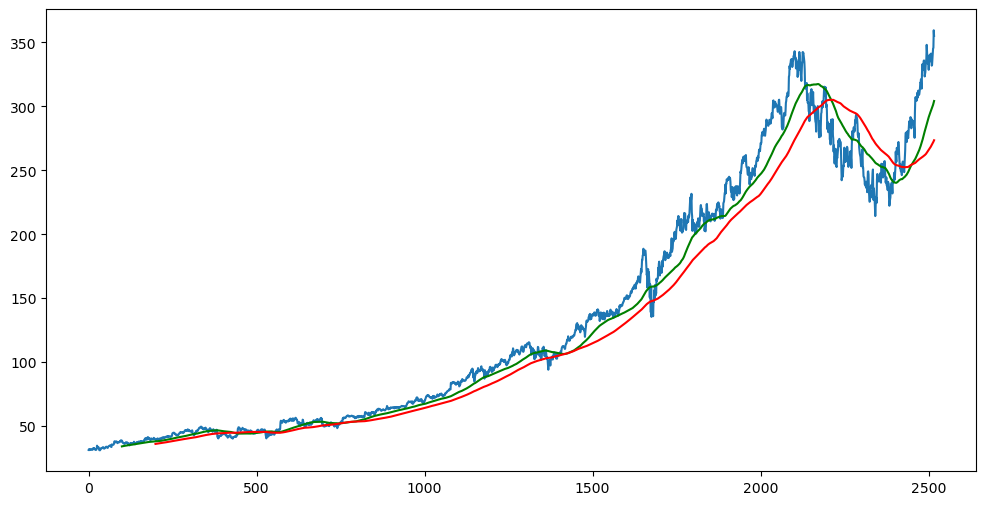

In [8]:
## Plot the graph for moving average for 100 days vs 200 days vs original closing values

plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'g')
plt.plot(ma200,'r')

In [9]:
df.shape

(2517, 5)

In [10]:
# Splitting Data into 70% Train and 30% Test Set

train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(train.shape)
print(test.shape)

(1761, 1)
(756, 1)


In [11]:
## Scaling down the data to 0 and 1 to be useable in an LSTM Model

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [12]:
## Convert Training Data into Array

train_arr=scaler.fit_transform(train)
train_arr

array([[0.00136485],
       [0.00469508],
       [0.0036578 ],
       ...,
       [0.96740732],
       [0.96571483],
       [0.9432221 ]])

In [13]:
train_arr.shape

(1761, 1)

In [14]:
x_train=[] ## List to save the trained values
y_train=[] ## List to save the predicted values

for i in range(100,train_arr.shape[0]):  ## Train the data on the first 100 values
    x_train.append(train_arr[i-100:i])
    y_train.append(train_arr[i,0])
    
x_train , y_train = np.array(x_train),np.array(y_train) ## Convert to numpy array to make it fit for model

# MODEL BUILDING

In [15]:
import tensorflow as tf
from keras.layers import Dense , Dropout , LSTM

In [16]:
from keras.models import Sequential

## Creating a Sequential Model

In [17]:
## Creating a Sequential Model

model = Sequential()

In [18]:
## Layer 1

model.add(LSTM(units=50, activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

## Layer 2

model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))

## Layer 3

model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

## Layer 4

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1)) ## Dense Layer is used to connect all other layers
                          ## Unit is 1 as we predict only the closing stock values

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [20]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 9s 170ms/step - loss: 0.0235
Epoch 2/50
52/52 [==============================] - 9s 168ms/step - loss: 0.0055
Epoch 3/50
52/52 [==============================] - 9s 171ms/step - loss: 0.0047
Epoch 4/50
52/52 [==============================] - 9s 173ms/step - loss: 0.0039
Epoch 5/50
52/52 [==============================] - 9s 175ms/step - loss: 0.0041
Epoch 6/50
52/52 [==============================] - 9s 176ms/step - loss: 0.0035
Epoch 7/50
52/52 [==============================] - 9s 177ms/step - loss: 0.0049
Epoch 8/50
52/52 [==============================] - 9s 180ms/step - loss: 0.0031
Epoch 9/50
52/52 [==============================] - 9s 179ms/step - loss: 0.0037
Epoch 10/50
52/52 [==============================] - 9s 180ms/step - loss: 0.0030
Epoch 11/50
52/52 [==============================] - 9s 180ms/step - loss: 0.0032 0s - loss: 0.
Epoch 12/50
52/52 [==============================] - 9s 181ms/step - loss: 0.0033 1s - 
Epoch

In [21]:
model.save('stock_predictor_model.h5')

# PREDICT VALUES FOR TEST DATASET

In [72]:
train.tail(100)

,Close
1661,168.070007
1662,170.169998
1663,158.179993
1664,162.009995
1665,172.789993
...,...
1756,213.669998
1757,207.070007
1758,208.350006
1759,208.039993


In [73]:
test.head()

,Close
1761,202.880005
1762,211.600006
1763,208.750000
1764,211.750000
1765,202.539993


In [74]:
## Extract last 100 days (rows) from training dataset
## store it in a variable to predict the value of the next day as test dataset - TIME SERIES ANALYSIS

past_100_days = train.tail(100)

In [75]:
final_df = past_100_days.append(test,ignore_index=True) ## Connect Last 100 days training data with the test data

In [76]:
final_df.head()

,Close
0,168.070007
1,170.169998
2,158.179993
3,162.009995
4,172.789993


In [77]:
## Perform Scaling of data to be suitable for model

input_data = scaler.fit_transform(final_df)
input_data

array([[0.14571344],
       [0.15508547],
       [0.10157538],
       [0.11866826],
       [0.16677822],
       [0.12982549],
       [0.15678139],
       [0.13768022],
       [0.11670465],
       [0.06783593],
       [0.11380373],
       [0.08126928],
       [0.01624492],
       [0.1044763 ],
       [0.        ],
       [0.04976128],
       [0.02222518],
       [0.03253452],
       [0.00861342],
       [0.00249921],
       [0.05766055],
       [0.05132325],
       [0.09233723],
       [0.06373008],
       [0.11072432],
       [0.09947789],
       [0.07448567],
       [0.08854375],
       [0.08216185],
       [0.13321733],
       [0.12527339],
       [0.13259253],
       [0.13263713],
       [0.13428838],
       [0.17083947],
       [0.16271705],
       [0.18574551],
       [0.19270768],
       [0.17690901],
       [0.14459772],
       [0.17003618],
       [0.16066408],
       [0.17463296],
       [0.17240151],
       [0.15347883],
       [0.18748604],
       [0.19543005],
       [0.174

In [78]:
input_data.shape

(856, 1)

In [79]:
x_test=[] ## List to save the testing values
y_test=[] ## List to save the predicted values

for i in range(100,input_data.shape[0]):  ## Test the data on the first 100 values
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test , y_test = np.array(x_test),np.array(y_test) ## Convert to numpy array to make it fit for model

In [80]:
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


# MAKE THE FINAL PREDICTIONS

In [81]:
y_predicted=model.predict(x_test)

y_predicted.shape

(756, 1)

In [82]:
## Find Factor by which the values have been scaled down

scaler.scale_

array([0.00446289])

In [83]:
## Convert values to original form so that they can be plotted

scale_factor = 1/0.00446289
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

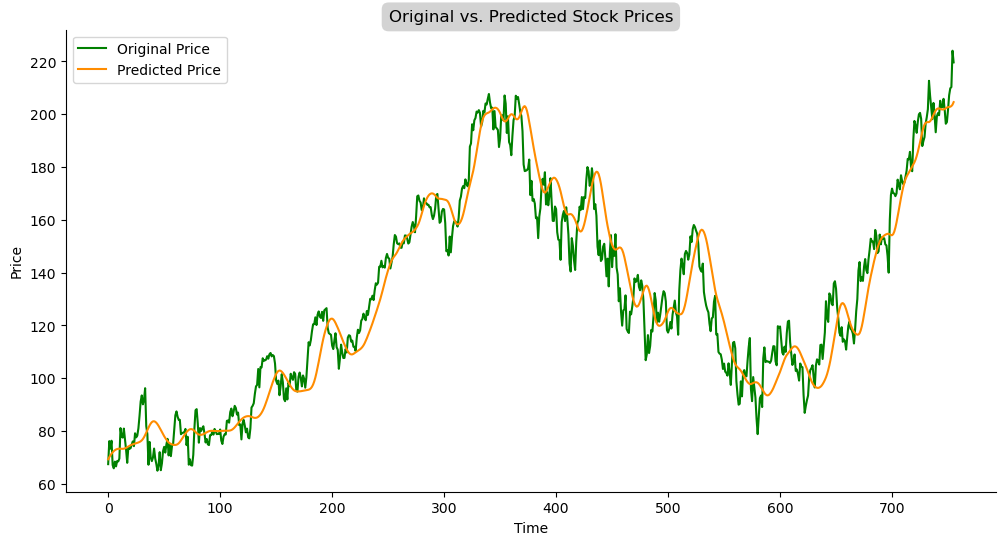

In [93]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'g',label='Original Price')
plt.plot(y_predicted,'darkorange',label='Predicted Price')
plt.title('Original vs. Predicted Stock Prices', loc='center', bbox=dict(facecolor='lightgray', edgecolor='white', boxstyle='round,pad=0.5',linewidth=2
))
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you already have y_predicted and y_test in their original form

# 1. Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)

# 2. Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_predicted, squared=False)

# 3. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predicted)

# 4. Calculate R-squared (R²)
r_squared = r2_score(y_test, y_predicted)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r_squared)


Mean Squared Error (MSE): 121.61146822351022
Root Mean Squared Error (RMSE): 11.027758984649157
Mean Absolute Error (MAE): 8.785182568524617
R-squared (R²): 0.9185184115873659
